# POLYNOMIAL MODEL FOR AVIATION DEMAND (With COVID)

## Install the necessary packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Get future oil prices until 2100

In [ ]:
# Put the historical data a variable
jet_fuel_prices = [
    0.498, 0.850, 0.725, 0.687, 0.824, 1.151, 1.715, 1.923, 2.131, 2.964,
    1.664, 2.149, 2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027,
    1.879, 1.099, 1.858, 3.374, 2.699, 2.420
]

#Test if the data is stationary or not (for ARIMA Model)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Not Stationary")

test_stationarity(jet_fuel_prices)

ADF Statistic: -2.3417849860703015
p-value: 0.15884528167577672
Not Stationary


In [ ]:
#Data is not stationary, so needs to apply difference to make it stationary

data_series = pd.Series(jet_fuel_prices)
jet_fuel_prices_diff = data_series.diff().dropna()
test_stationarity(jet_fuel_prices_diff)

ADF Statistic: -4.914987435427071
p-value: 3.260590440252262e-05
Stationary


In [ ]:
#Forecast the data until 2100
model = ARIMA(jet_fuel_prices, order=(2,2,1))
result = model.fit()

forecast = result.forecast(steps=76) #76 steps from 2024 to 2100
print(forecast)

[2.8100988  3.02112395 2.991256   3.03946151 3.17375422 3.27490001
 3.34552815 3.42994511 3.52508448 3.61458073 3.70034726 3.78839223
 3.87771972 3.96613777 4.05412076 4.14246312 4.23095067 4.31929748
 4.40759681 4.49595082 4.58431994 4.67266798 4.76101138 4.84936286
 4.93771568 5.02606543 5.11441483 5.20276538 5.29111602 5.37946621
 5.4678164  5.55616675 5.6445171  5.73286739 5.82121768 5.90956799
 5.9979183  6.08626861 6.17461891 6.26296922 6.35131952 6.43966983
 6.52802013 6.61637044 6.70472075 6.79307105 6.88142136 6.96977166
 7.05812197 7.14647227 7.23482258 7.32317289 7.41152319 7.4998735
 7.5882238  7.67657411 7.76492441 7.85327472 7.94162503 8.02997533
 8.11832564 8.20667594 8.29502625 8.38337655 8.47172686 8.56007717
 8.64842747 8.73677778 8.82512808 8.91347839 9.00182869 9.090179
 9.17852931 9.26687961 9.35522992 9.44358022]


## Train polynomial model

In [79]:
# Data from the provided image
data = {
    'Year': np.arange(1990, 2024),
    'Passengers': [157891000, 150528000, 164292000, 169958600, 182625300, 193536844, 213329200, 235129900, 245065100, 266190600,
                   288449342, 286388891, 287161373, 317807082, 347767674, 359471494, 390742949, 425646377, 427781328, 419908189,
                   483874507, 515081475, 514301801, 522944433, 548633991, 588104162, 620961607, 657059035, 691558405, 752764694,
                    224581686, 300510413, 820330000, 976400000], #done
    'Oil_Price': [0.762, 0.608, 0.572, 0.529, 0.493, 0.494, 0.611, 0.560, 0.403, 0.498,
                  0.850, 0.725, 0.687, 0.824, 1.151, 1.715, 1.923, 2.131, 2.964, 1.664,
                  2.149, 2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027, 1.879,
                  1.099, 1.858, 3.374, 2.699], #done
    'GDP': [15459.50, 15971.55, 17510.23, 15933.07, 16835.47, 19464.09, 19749.86, 18088.60, 18615.77, 18482.62, 
            16947.76, 17198.04, 18759.70, 22967.93, 26307.20, 27341.73, 29089.71, 33587.35, 37044.04, 33480.55, 
            32965.58, 35767.08, 33169.12, 34564.58, 35282.03, 30487.16, 31174.03, 33090.63, 35751.57, 35079.53,
             34356.57, 38721.08, 37433.28, 39770.38], #done
    'Population': [420308868, 421744728, 422972438, 424347768, 425406851, 426212138, 426906931, 427549432, 428122323, 428828749,
                   429342455, 429910140, 430898141, 432434810, 434059923, 435600393, 437014860, 438484072, 439892213, 440934530,
                   441552554, 440769682, 441419873, 442496175, 443601373, 444570054, 445515422, 446215182, 447001100, 447367191,
                    447692315, 447178093, 447370551, 449476878] #done
}

df = pd.DataFrame(data)
#print (df)

X = df[['Oil_Price', 'GDP', 'Population']]
y = df['Passengers']

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Linear Regression model
model = LinearRegression()
model.fit(X_poly, y)

#Testing with data 
new_data = np.array([[0.762, 15459.50, 420308868]])  #testing the data for year 1990
new_data_poly = poly.transform(new_data)

# Predicting the price
predicted_price = model.predict(new_data_poly)
print(predicted_price)

[1.27982937e+08]


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Testing the data from year 2010 to 2019

In [80]:
# Testing with data from 2010 to 2019
data_testing = {
    'Year': np.arange(2010, 2019),
    'Passengers': [515081475, 514301801, 522944433, 548633991, 588104162, 620961607, 657059035, 691558405, 752764694],
    'Oil_Price': [2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027, 1.879],
    'GDP': [35767.08, 33169.12, 34564.58, 35282.03, 30487.16, 31174.03, 33090.63, 35751.57, 35079.53],
    'Population': [440769682, 441419873, 442496175, 443601373, 444570054, 445515422, 446215182, 447001100, 447367191]
}

data_testing_df = pd.DataFrame(data_testing)

# Initialize an empty list to store predicted passengers
predicted_passengers = []

for index, row in data_testing_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
data_testing_df['Predicted_Passengers'] = predicted_passengers

# Print the table with predictions
print(data_testing_df)

   Year  Passengers  Oil_Price       GDP  Population  Predicted_Passengers
0  2010   515081475      2.998  35767.08   440769682          5.327269e+08
1  2011   514301801      3.056  33169.12   441419873          6.247001e+08
2  2012   522944433      2.920  34564.58   442496175          6.198099e+08
3  2013   548633991      2.693  35282.03   443601373          6.053873e+08
4  2014   588104162      1.522  30487.16   444570054          5.881794e+08
5  2015   620961607      1.252  31174.03   445515422          5.743637e+08
6  2016   657059035      1.558  33090.63   446215182          5.850468e+08
7  2017   691558405      2.027  35751.57   447001100          6.116416e+08
8  2018   752764694      1.879  35079.53   447367191          6.251737e+08


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

## Extract model's equation (to confirm?)

In [81]:
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
# Feature names for the polynomial terms
feature_names = poly.get_feature_names_out()

# Construct the polynomial equation
equation = f"y = {intercept:.2f}"
for coef, name in zip(coefficients, feature_names):
    if coef != 0:
        equation += f" + ({coef:.2f})*{name}"

print("Polynomial Regression Equation:")
print(equation)


[ 0.00000000e+00  1.18232890e+03 -2.63466518e+05 -4.14795110e+02
 -2.97997888e+02  1.71332299e+04 -8.98918341e-01 -2.06867253e+00
  7.56245128e-04  4.90989369e-07]
Polynomial Regression Equation:
y = 87471719185.62 + (1182.33)*Oil_Price + (-263466.52)*GDP + (-414.80)*Population + (-298.00)*Oil_Price^2 + (17133.23)*Oil_Price GDP + (-0.90)*Oil_Price Population + (-2.07)*GDP^2 + (0.00)*GDP Population + (0.00)*Population^2


## SSP2 FORECASTING

    Year           GDP  Population  Oil_Price  Predicted_Passengers
0   2025   44874.48025   446236511       2.81          3.324088e+08
1   2030   49037.24449   443854069       3.27          9.979338e+07
2   2035   53016.81044   441591352       3.70          1.394015e+08
3   2040   57004.19650   439684545       4.14          3.672658e+08
4   2045   60893.32538   438044333       4.58          5.815532e+08
5   2050   64686.67546   436605103       5.02          7.827444e+08
6   2055   68547.25845   434385889       5.47          1.037957e+09
7   2060   72536.31069   431492232       5.91          1.367177e+09
8   2065   76648.73768   427957935       6.35          1.764395e+09
9   2070   80635.24494   424316800       6.79          2.162417e+09
10  2075   84409.65071   420871648       7.23          2.524922e+09
11  2080   87958.74009   417617711       7.68          2.832220e+09
12  2085   91341.51811   414336918       8.12          3.123270e+09
13  2090   94625.17367   410823860       8.56   

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

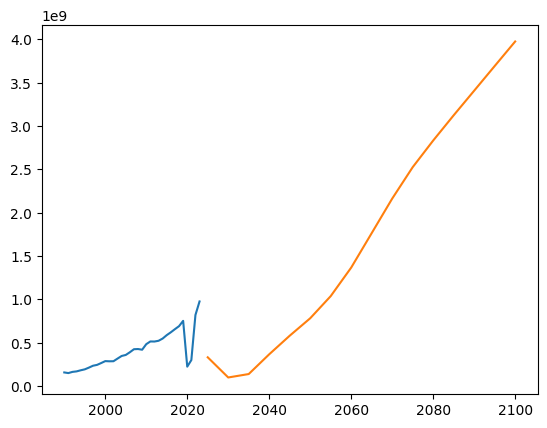

In [82]:

# SSP2 data (done)
SSP2_data = {
    'Year': [2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100],
    'GDP': [44874.48025, 49037.24449, 53016.81044, 57004.1965, 60893.32538, 64686.67546, 68547.25845, 72536.31069, 76648.73768, 80635.24494, 84409.65071, 87958.74009, 91341.51811, 94625.17367, 97831.44962, 100925.7066],
    'Population': [446236511, 443854069, 441591352, 439684545, 438044333, 436605103, 434385889, 431492232, 427957935, 424316800, 420871648, 417617711, 414336918, 410823860, 406941065, 402484116],
    'Oil_Price': [2.81, 3.27,3.70, 4.14, 4.58, 5.02, 5.47, 5.91, 6.35, 6.79, 7.23, 7.68, 8.12, 8.56, 9.00, 9.44]
}

# Create a DataFrame from SSP2 data
SSP2_df = pd.DataFrame(SSP2_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP2_df to predict passengers
for index, row in SSP2_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
SSP2_df['Predicted_Passengers'] = predicted_passengers

# Ensure all predicted passengers are non-negative
SSP2_df['Predicted_Passengers'] = SSP2_df['Predicted_Passengers'].apply(lambda x: abs(x))

# Print the table with predictions
print(SSP2_df)

plt.plot(data['Year'], data['Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])

## SSP3 FORECASTING

    Year          GDP  Population  Oil_Price  Predicted_Passengers
0   2025  44972.19890   445266898       2.81          2.734277e+08
1   2030  49139.66803   441743088       3.27         -2.238747e+07
2   2035  52255.56606   438461797       3.70         -2.429472e+08
3   2040  54574.49250   435805436       4.14         -3.506234e+08
4   2045  56230.53373   433175979       4.58         -3.839358e+08
5   2050  57462.92679   430833859       5.02         -3.494847e+08
6   2055  58487.95039   428136680       5.47         -2.914035e+08
7   2060  59276.34844   425716485       5.91         -1.908851e+08
8   2065  59813.65359   423966422       6.35         -2.825224e+07
9   2070  59951.71169   423554709       6.79          2.280168e+08
10  2075  59739.05754   424632777       7.23          5.701486e+08
11  2080  59265.83287   426996726       7.68          9.834484e+08
12  2085  58635.47242   430374300       8.12          1.435856e+09
13  2090  57910.26120   434576876       8.56          1.924443

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

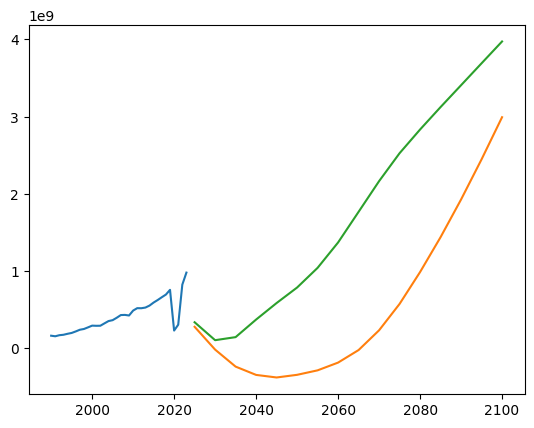

In [83]:
# SSP3 data
SSP3_data = {
    'Year': [2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100],
    'GDP': [44972.1989, 49139.66803, 52255.56606, 54574.4925, 56230.53373, 57462.92679, 58487.95039, 59276.34844, 59813.65359, 59951.71169, 59739.05754, 59265.83287, 58635.47242, 57910.2612, 57102.31895, 56192.10944],
    'Population': [445266898, 441743088, 438461797, 435805436, 433175979, 430833859, 428136680, 425716485, 423966422, 423554709, 424632777, 426996726, 430374300, 434576876, 439452561, 444820683],
    'Oil_Price': [2.81, 3.27,3.70, 4.14, 4.58, 5.02, 5.47, 5.91, 6.35, 6.79, 7.23, 7.68, 8.12, 8.56, 9.00, 9.44]
}

# Create a DataFrame from SSP3 data
SSP3_df = pd.DataFrame(SSP3_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP3_df to predict passengers
for index, row in SSP3_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP3_df
SSP3_df['Predicted_Passengers'] = predicted_passengers

# Print the table with predictions
print(SSP3_df)

plt.plot(data['Year'], data['Passengers'])
plt.plot(SSP3_df['Year'], SSP3_df['Predicted_Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])

# POLYNOMIAL MODEL (Without COVID)

## Install the necessary packages

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Get future oil prices until 2100

In [45]:
# Put the historical data a variable
jet_fuel_prices = [
    0.498, 0.850, 0.725, 0.687, 0.824, 1.151, 1.715, 1.923, 2.131, 2.964,
    1.664, 2.149, 2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027,
    1.879, 1.099, 1.858, 3.374, 2.699, 2.420
]

#Test if the data is stationary or not (for ARIMA Model)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Not Stationary")

test_stationarity(jet_fuel_prices)

ADF Statistic: -2.3417849860703015
p-value: 0.15884528167577672
Not Stationary


In [46]:
#Data is not stationary, so needs to apply difference to make it stationary

data_series = pd.Series(jet_fuel_prices)
jet_fuel_prices_diff = data_series.diff().dropna()
test_stationarity(jet_fuel_prices_diff)

ADF Statistic: -4.914987435427071
p-value: 3.260590440252262e-05
Stationary


In [47]:
#Forecast the data until 2100
model = ARIMA(jet_fuel_prices, order=(2,2,1))
result = model.fit()

forecast = result.forecast(steps=76) #76 steps from 2024 to 2100
print(forecast)

[2.8100988  3.02112395 2.991256   3.03946151 3.17375422 3.27490001
 3.34552815 3.42994511 3.52508448 3.61458073 3.70034726 3.78839223
 3.87771972 3.96613777 4.05412076 4.14246312 4.23095067 4.31929748
 4.40759681 4.49595082 4.58431994 4.67266798 4.76101138 4.84936286
 4.93771568 5.02606543 5.11441483 5.20276538 5.29111602 5.37946621
 5.4678164  5.55616675 5.6445171  5.73286739 5.82121768 5.90956799
 5.9979183  6.08626861 6.17461891 6.26296922 6.35131952 6.43966983
 6.52802013 6.61637044 6.70472075 6.79307105 6.88142136 6.96977166
 7.05812197 7.14647227 7.23482258 7.32317289 7.41152319 7.4998735
 7.5882238  7.67657411 7.76492441 7.85327472 7.94162503 8.02997533
 8.11832564 8.20667594 8.29502625 8.38337655 8.47172686 8.56007717
 8.64842747 8.73677778 8.82512808 8.91347839 9.00182869 9.090179
 9.17852931 9.26687961 9.35522992 9.44358022]


## Train polynomial model

In [48]:
# Data from the provided image
data = {
    'Year': np.arange(1990, 2020),
    'Passengers': [157891000, 150528000, 164292000, 169958600, 182625300, 193536844, 213329200, 235129900, 245065100, 266190600,
                   288449342, 286388891, 287161373, 317807082, 347767674, 359471494, 390742949, 425646377, 427781328, 419908189,
                   483874507, 515081475, 514301801, 522944433, 548633991, 588104162, 620961607, 657059035, 691558405, 752764694],
    'Oil_Price': [0.762, 0.608, 0.572, 0.529, 0.493, 0.494, 0.611, 0.560, 0.403, 0.498,
                  0.850, 0.725, 0.687, 0.824, 1.151, 1.715, 1.923, 2.131, 2.964, 1.664,
                  2.149, 2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027, 1.879],
    'GDP': [15459.50, 15971.55, 17510.23, 15933.07, 16835.47, 19464.09, 19749.86, 18088.60, 18615.77, 18482.62, 
            16947.76, 17198.04, 18759.70, 22967.93, 26307.20, 27341.73, 29089.71, 33587.35, 37044.04, 33480.55, 
            32965.58, 35767.08, 33169.12, 34564.58, 35282.03, 30487.16, 31174.03, 33090.63, 35751.57, 35079.53],
    'Population': [420308868, 421744728, 422972438, 424347768, 425406851, 426212138, 426906931, 427549432, 428122323, 428828749,
                   429342455, 429910140, 430898141, 432434810, 434059923, 435600393, 437014860, 438484072, 439892213, 440934530,
                   441552554, 440769682, 441419873, 442496175, 443601373, 444570054, 445515422, 446215182, 447001100, 447367191]
}

df = pd.DataFrame(data)
#print (df)

X = df[['Oil_Price', 'GDP', 'Population']]
y = df['Passengers']

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Linear Regression model
model = LinearRegression()
model.fit(X_poly, y)

#Testing with data 
new_data = np.array([[0.762, 15459.50, 420308868]])  #testing the data for year 1990
new_data_poly = poly.transform(new_data)

# Predicting the price
predicted_price = model.predict(new_data_poly)
print(predicted_price)

[1.47936697e+08]


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Testing the data from year 2010 to 2019

In [49]:
# Testing with data from 2010 to 2019
data_testing = {
    'Year': np.arange(2010, 2019),
    'Passengers': [515081475, 514301801, 522944433, 548633991, 588104162, 620961607, 657059035, 691558405, 752764694],
    'Oil_Price': [2.998, 3.056, 2.920, 2.693, 1.522, 1.252, 1.558, 2.027, 1.879],
    'GDP': [35767.08, 33169.12, 34564.58, 35282.03, 30487.16, 31174.03, 33090.63, 35751.57, 35079.53],
    'Population': [440769682, 441419873, 442496175, 443601373, 444570054, 445515422, 446215182, 447001100, 447367191]
}

data_testing_df = pd.DataFrame(data_testing)

# Initialize an empty list to store predicted passengers
predicted_passengers = []

for index, row in data_testing_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
data_testing_df['Predicted_Passengers'] = predicted_passengers

# Print the table with predictions
print(data_testing_df)

   Year  Passengers  Oil_Price       GDP  Population  Predicted_Passengers
0  2010   515081475      2.998  35767.08   440769682          4.775365e+08
1  2011   514301801      3.056  33169.12   441419873          5.156193e+08
2  2012   522944433      2.920  34564.58   442496175          5.401192e+08
3  2013   548633991      2.693  35282.03   443601373          5.690387e+08
4  2014   588104162      1.522  30487.16   444570054          6.151182e+08
5  2015   620961607      1.252  31174.03   445515422          6.402584e+08
6  2016   657059035      1.558  33090.63   446215182          6.577045e+08
7  2017   691558405      2.027  35751.57   447001100          6.775066e+08
8  2018   752764694      1.879  35079.53   447367191          6.935611e+08


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

## Extract model's equation (to confirm?)

In [57]:
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
# Feature names for the polynomial terms
feature_names = poly.get_feature_names_out()

# Construct the polynomial equation
equation = f"y = {intercept:.2f}"
for coef, name in zip(coefficients, feature_names):
    if coef != 0:
        equation += f" + ({coef:.2f})*{name}"

print("Polynomial Regression Equation:")
print(equation)


[ 0.00000000e+00  6.64856250e+00  1.50986799e+03 -4.41853388e+02
  2.22556082e+00  7.23129905e+02 -1.32906506e-02 -2.58854169e-02
 -1.83394460e-05  5.38119450e-07]
Polynomial Regression Equation:
y = 90896645095.84 + (6.65)*Oil_Price + (1509.87)*GDP + (-441.85)*Population + (2.23)*Oil_Price^2 + (723.13)*Oil_Price GDP + (-0.01)*Oil_Price Population + (-0.03)*GDP^2 + (-0.00)*GDP Population + (0.00)*Population^2


## SSP2 FORECASTING

    Year           GDP  Population  Oil_Price  Predicted_Passengers
0   2020   39491.19010   445390196      1.099          5.691027e+08
1   2025   44874.48025   446236511      2.810          6.025628e+08
2   2030   49037.24449   443854069      3.270          5.005098e+08
3   2035   53016.81044   441591352      3.700          4.109422e+08
4   2040   57004.19650   439684545      4.140          3.398976e+08
5   2045   60893.32538   438044333      4.580          2.829422e+08
6   2050   64686.67546   436605103      5.020          2.367839e+08
7   2055   68547.25845   434385889      5.470          1.754744e+08
8   2060   72536.31069   431492232      5.910          1.058302e+08
9   2065   76648.73768   427957935      6.350          3.539685e+07
10  2070   80635.24494   424316800      6.790          2.000032e+07
11  2075   84409.65071   420871648      7.230          5.587104e+07
12  2080   87958.74009   417617711      7.680          7.393717e+07
13  2085   91341.51811   414336918      8.120   

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

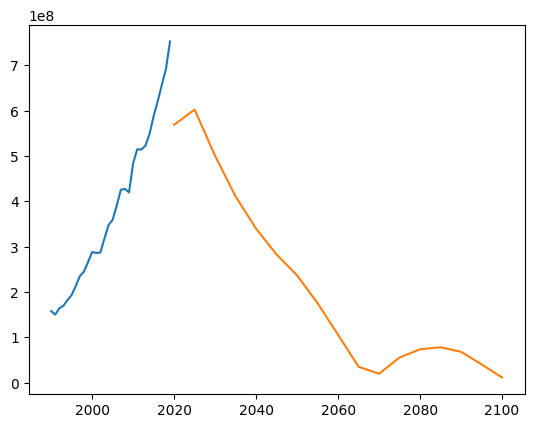

In [76]:


# SSP2 data
SSP2_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100],
    'GDP': [39491.1901, 44874.48025, 49037.24449, 53016.81044, 57004.1965, 60893.32538, 64686.67546, 68547.25845, 72536.31069, 76648.73768, 80635.24494, 84409.65071, 87958.74009, 91341.51811, 94625.17367, 97831.44962, 100925.7066],
    'Population': [445390196, 446236511, 443854069, 441591352, 439684545, 438044333, 436605103, 434385889, 431492232, 427957935, 424316800, 420871648, 417617711, 414336918, 410823860, 406941065, 402484116],
    'Oil_Price': [1.099, 2.81, 3.27,3.70, 4.14, 4.58, 5.02, 5.47, 5.91, 6.35, 6.79, 7.23, 7.68, 8.12, 8.56, 9.00, 9.44]
}

# Create a DataFrame from SSP2 data
SSP2_df = pd.DataFrame(SSP2_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP2_df to predict passengers
for index, row in SSP2_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
SSP2_df['Predicted_Passengers'] = predicted_passengers

# Ensure all predicted passengers are non-negative
SSP2_df['Predicted_Passengers'] = SSP2_df['Predicted_Passengers'].apply(lambda x: abs(x))

# Print the table with predictions
print(SSP2_df)

plt.plot(data['Year'], data['Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])

## SSP3 FORECASTING

    Year          GDP  Population  Oil_Price  Predicted_Passengers
0   2020  39491.19010   445390196      1.099          5.691027e+08
1   2025  44972.19890   445266898      2.810          5.659870e+08
2   2030  49139.66803   441743088      3.270          4.285480e+08
3   2035  52255.56606   438461797      3.700          3.198780e+08
4   2040  54574.49250   435805436      4.140          2.461394e+08
5   2045  56230.53373   433175979      4.580          1.860851e+08
6   2050  57462.92679   430833859      5.020          1.429121e+08
7   2055  58487.95039   428136680      5.470          1.015941e+08
8   2060  59276.34844   425716485      5.910          7.383939e+07
9   2065  59813.65359   423966422      6.350          6.279324e+07
10  2070  59951.71169   423554709      6.790          7.336781e+07
11  2075  59739.05754   424632777      7.230          1.052698e+08
12  2080  59265.83287   426996726      7.680          1.599873e+08
13  2085  58635.47242   430374300      8.120          2.404699

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

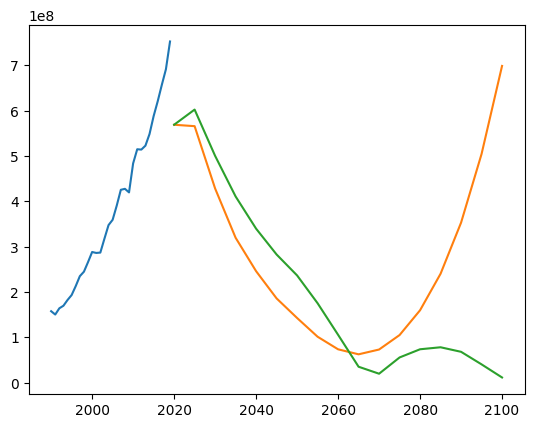

In [78]:
# SSP3 data
SSP3_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100],
    'GDP': [39491.1901, 44972.1989, 49139.66803, 52255.56606, 54574.4925, 56230.53373, 57462.92679, 58487.95039, 59276.34844, 59813.65359, 59951.71169, 59739.05754, 59265.83287, 58635.47242, 57910.2612, 57102.31895, 56192.10944],
    'Population': [445390196, 445266898, 441743088, 438461797, 435805436, 433175979, 430833859, 428136680, 425716485, 423966422, 423554709, 424632777, 426996726, 430374300, 434576876, 439452561, 444820683],
    'Oil_Price': [1.099, 2.81, 3.27,3.70, 4.14, 4.58, 5.02, 5.47, 5.91, 6.35, 6.79, 7.23, 7.68, 8.12, 8.56, 9.00, 9.44]
}

# Create a DataFrame from SSP3 data
SSP3_df = pd.DataFrame(SSP3_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP3_df to predict passengers
for index, row in SSP3_df.iterrows():
    new_data = np.array([[row['Oil_Price'], row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP3_df
SSP3_df['Predicted_Passengers'] = predicted_passengers

# Print the table with predictions
print(SSP3_df)

plt.plot(data['Year'], data['Passengers'])
plt.plot(SSP3_df['Year'], SSP3_df['Predicted_Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])